# Mass Food Production Analysis

## Start

important libraries

In [128]:
import pandas as pd
import numpy as np
large_number = np.array([9223372036854775807], dtype=np.int64)
import matplotlib.pyplot as plt
import seaborn as sns

The data set

In [129]:
food_prod = pd.read_csv("world food production.csv")
food_prod.columns = food_prod.columns.str.replace('Production \\(tonnes\\)', '', regex = True)
food_prod.columns = food_prod.columns.str.replace('Production \\( tonnes\\)', '', regex = True)
food_prod.columns = food_prod.columns.str.replace('Production \\( tonnes \\)', '', regex = True)

food_prod.columns = food_prod.columns.str.strip()
food_prod

,Entity,Year,Maize,Rice,Yams,Wheat,Tomatoes,Tea,Sweet potatoes,Sunflower seed,...,Oranges,"Peas, dry",Palm oil,Grapes,"Coffee, green",Cocoa beans,"Meat, chicken",Bananas,Avocados,Apples
0,Afghanistan,1961,700000.0,319000.00,7.467702e+06,2279000.00,1873812.000,56315.0,3270871.000,12000.000,...,10100.000,232910.000,1131882.00,2.250000e+05,870970.000,835368.000,5600.00,3139079.000,63439.000,15100.000
1,Afghanistan,1962,700000.0,319000.00,7.420515e+06,2279000.00,2044797.000,61519.0,3562524.000,12800.000,...,10100.000,259412.000,1111006.00,2.250000e+05,883512.000,867170.000,6000.00,3181580.000,65118.000,15100.000
2,Afghanistan,1963,713000.0,319000.00,8.479074e+06,1947000.00,2096077.000,63596.0,3409916.000,12800.000,...,10100.000,251529.000,1145004.00,2.250000e+05,996674.000,922621.000,6160.00,3304256.000,61760.000,15100.000
3,Afghanistan,1964,720000.0,380000.00,9.113779e+06,2230000.00,2388264.000,66604.0,3229336.000,12800.000,...,12400.000,247556.000,1160831.00,2.650000e+05,1162048.000,1190061.000,6400.00,3392527.000,62759.000,18400.000
4,Afghanistan,1965,720000.0,380000.00,1.006791e+07,2282000.00,2559608.000,72418.0,3169104.000,13200.000,...,13700.000,266947.000,1138860.00,2.870000e+05,1075084.000,874245.000,6800.00,3450849.000,66269.000,20400.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11907,Zimbabwe,2017,1532572.0,20502618.00,2.673608e+05,30991516.16,324020.864,83904.6,874.408,4077308.066,...,129055.800,40749.600,661978.98,7.018985e+06,63.200,34945.000,75000.00,1267.200,145042.096,1579154.000
11908,Zimbabwe,2018,1560100.0,31871776.60,2.667498e+05,16884482.98,309316.252,66842.6,1383.792,2107639.306,...,168074.000,21606.400,485223.38,3.415107e+06,68.000,34659.800,80357.14,1016.776,143384.384,907419.000
11909,Zimbabwe,2019,773976.0,3382151.40,4.790022e+05,64989733.20,540128.592,9854.4,298831.560,3320915.400,...,1134136.812,45436.400,361128.20,9.645766e+06,30401.400,20961.132,79790.97,195845.198,525095.272,3117813.560
11910,Zimbabwe,2020,1202347.0,3535631.80,7.437612e+05,43020887.20,5635740.200,276279.0,1727311.800,983256.000,...,72179.400,12023.200,279613.40,1.131937e+07,574723.374,158022.122,8000.00,1523258.600,28946.840,7994169.220


Uncomment to see stats

In [130]:
stats=food_prod.describe().iloc[1:,1:].astype(int)
stats

,Maize,Rice,Yams,Wheat,Tomatoes,Tea,Sweet potatoes,Sunflower seed,Sugar cane,Soybeans,...,Oranges,"Peas, dry",Palm oil,Grapes,"Coffee, green",Cocoa beans,"Meat, chicken",Bananas,Avocados,Apples
mean,19264341,22545415,2744972,23656842,3238661,135052,5021303,1410296,52184114,7902079,...,2176532,637570,1502614,3623623,354998,219166,1165718,2653282,156476,3260419
std,70280220,77497792,8787786,61778994,11469918,254426,20016916,3625725,152708453,27737815,...,6078085,1527103,6144476,8225799,878539,583550,4050975,8178865,423978,8748226
min,0,0,0,0,0,10,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25%,23793,39024,11762,88925,12500,2040,7082,15376,331210,3811,...,11827,5196,13841,67577,3119,1092,3882,10071,3681,44316
50%,400049,454374,123605,1650000,129141,25645,78284,148150,3275769,84583,...,146906,47557,78876,468066,32295,9160,36590,150837,35778,422207
75%,4979875,4440542,572103,15241489,869135,119267,747221,1115601,25072266,1019846,...,1434049,426971,414505,3080175,212614,125047,354740,1187961,116031,1950000
max,1210235100,787293900,78714050,772305500,189133950,2524670,152861970,58185630,1958233500,371693600,...,76566650,16637456,79067790,80015896,10795444,5780850,50175664,124978580,8685672,93144360


In [131]:
#Countries in the data set
countries = food_prod['Entity'].unique()
print(f'There are {len(countries)-1} Countries')

There are 225 Countries


In [132]:
# years
years = food_prod['Year'].unique()
print(f'There are {len(years)-1} Years')


There are 60 Years


In [133]:
list_food = food_prod.iloc[:0,2:]

print(list_food.columns) # uncomment to see the list of food types
print(f'There are {len(list_food.columns)} food type in the dataset')

Index(['Maize', 'Rice', 'Yams', 'Wheat', 'Tomatoes', 'Tea', 'Sweet potatoes',
       'Sunflower seed', 'Sugar cane', 'Soybeans', 'Rye', 'Potatoes',
       'Oranges', 'Peas, dry', 'Palm oil', 'Grapes', 'Coffee, green',
       'Cocoa beans', 'Meat, chicken', 'Bananas', 'Avocados', 'Apples'],
      dtype='object')
There are 22 food type in the dataset


## Leading Countries on different food production


### Total Food Produced  ? 

In [134]:
sum_ea = food_prod.sum()
sum_ea = sum_ea.drop(['Entity', 'Year'])
csv=sum_ea.astype(np.int64).sort_values(ascending= False).to_frame('Total Food Sum')
formatted_max_value = "{:,}".format(csv.max().values[0])
print(f'The Top Food is {csv.idxmax().values[0]} which was {formatted_max_value}')
csv = csv.reset_index()
csv.index = csv.index +1
csv

The Top Food is Sugar cane which was 621,617,167,347


,index,Total Food Sum
1,Sugar cane,621617167347
2,Wheat,281800313050
3,Rice,268560991261
4,Maize,229476833844
5,Potatoes,145931429447
6,Soybeans,94129571154
7,Sweet potatoes,59813763029
8,Grapes,43164600390
9,Apples,38838115868
10,Tomatoes,38578933257


 1 Sugar cane Production

Sugar cane country list

In [135]:
Sugar_cane_list = food_prod[food_prod['Sugar cane'].notnull()][['Sugar cane', 'Entity']]
grouped = Sugar_cane_list.groupby('Entity').sum()

# Find the country with the maximum sum
top_entity = grouped.idxmax().iloc[0]
top_value = grouped.max().iloc[0]


# Format the maximum value with commas as thousand separators
formatted_max_value = "{:,}".format(top_value)

print(f'The top Country is {top_entity} which was {formatted_max_value}')
countries_prod = grouped.sort_values(by= 'Sugar cane',ascending=False).astype(np.int64)
countries_prod=countries_prod.reset_index()
countries_prod.index = countries_prod.index + 1
print(f'And here a list with the top 5 and the bottom 5 countries')
countries_prod

The top Country is Peru which was 54,773,751,310.0
And here a list with the top 5 and the bottom 5 countries


,Entity,Sugar cane
1,Peru,54773751310
2,Albania,34541601220
3,Oceania,28658236408
4,Antigua and Barbuda,26498532140
5,Argentina,26253459124
...,...,...
222,Mauritania,377117
223,Lower-middle-income countries,158981
224,Djibouti,111450
225,Denmark,103670


 Function for other food types

In [136]:
def food_analysis(food_type):
    # Filter the food_prod dataframe by the food type
    food_list = food_prod[food_prod[food_type].notnull()][[food_type, 'Entity']]
    # Group by the entity and sum the production values
    grouped = food_list.groupby('Entity').sum()
    # Find the country with the maximum sum
    top_entity = grouped.idxmax().iloc[0]
    top_value = grouped.max().iloc[0]
    # Format the maximum value with commas as thousand separators
    formatted_max_value = "{:,}".format(top_value)
    # Print the top country and its value
    print(f'The Top country for {food_type} is {top_entity} which was {formatted_max_value}')
    # Sort the countries by their production values in descending order
    countries_prod = grouped.sort_values(by= food_type, ascending=False).astype(np.int64)
    # Reset the index and add 1
    countries_prod = countries_prod.reset_index()
    countries_prod.index = countries_prod.index + 1
    # Print the list of the top 5 and the bottom 5 countries
    print(f'And here is a list of the top 5 and the bottom 5 countries for {food_type}')
    #print(countries_prod.head(5))
    #print(countries_prod.tail(5))
    # Return the list of countries and their production values
    return countries_prod

 2 Wheat Production (tonnes)

In [137]:
food_analysis('Wheat')

The Top country for Wheat is Saint Lucia which was 25,105,089,310.0
And here is a list of the top 5 and the bottom 5 countries for Wheat


,Entity,Wheat
1,Saint Lucia,25105089310
2,Poland,12622020701
3,Asia,12160153404
4,Eastern Africa (FAO),11884365281
5,Cote d'Ivoire,11667552736
...,...,...
222,Guinea-Bissau,100508
223,High-income countries,100412
224,Sweden,64644
225,Mozambique,26527


 3	Rice Production ( tonnes)

In [138]:
food_analysis('Rice')

The Top country for Rice is Asia which was 28,167,504,010.0
And here is a list of the top 5 and the bottom 5 countries for Rice


,Entity,Rice
1,Asia,28167504010
2,South Africa,17602150794
3,Armenia,17545392400
4,Western Africa (FAO),15905210324
5,South America,13385584933
...,...,...
222,Ecuador,111670
223,Algeria,104886
224,Finland,91209
225,Net Food Importing Developing Countries (FAO),32698


 4	Maize Production (tonnes)

In [139]:
food_analysis('Maize')

The Top country for Maize is World which was 35,038,073,230.0
And here is a list of the top 5 and the bottom 5 countries for Maize


,Entity,Maize
1,World,35038073230
2,Americas (FAO),18633523410
3,High-income countries,16264928394
4,North America,15045342140
5,Upper-middle-income countries,13891930270
...,...,...
222,Ireland,0
223,Finland,0
224,Malta,0
225,Latvia,0


 5	Potatoes Production (tonnes)	

In [140]:
food_analysis('Potatoes')

The Top country for Potatoes is El Salvador which was 10,048,623,314.0
And here is a list of the top 5 and the bottom 5 countries for Potatoes


,Entity,Potatoes
1,El Salvador,10048623314
2,Egypt,9670283314
3,Ukraine,8760276330
4,Western Africa (FAO),6712634691
5,Dominica,6655887512
...,...,...
222,Sweden,6551
223,Croatia,5523
224,Belgium,2870
225,Azerbaijan,1603


 6	Soybeans Production (tonnes)	

In [141]:
food_analysis('Soybeans')

The Top country for Soybeans is Namibia which was 8,500,710,781.0
And here is a list of the top 5 and the bottom 5 countries for Soybeans


,Entity,Soybeans
1,Namibia,8500710781
2,Albania,6834513087
3,Taiwan,4107108224
4,Mexico,4053988975
5,Guinea,3973763248
...,...,...
222,India,44289
223,Kazakhstan,33420
224,Finland,17030
225,Armenia,563


 7	Sweet potatoes Production (tonnes)	

In [142]:
food_analysis('Sweet potatoes')

The Top country for Sweet potatoes is Angola which was 6,399,773,432.0
And here is a list of the top 5 and the bottom 5 countries for Sweet potatoes


,Entity,Sweet potatoes
1,Angola,6399773432
2,Antigua and Barbuda,6110563084
3,Cambodia,5819511844
4,Poland,5730370296
5,Rwanda,5103905712
...,...,...
222,Ireland,12464
223,Algeria,10722
224,Micronesia (FAO),9285
225,Belgium,6973


 8	Grapes Production (tonnes)

In [143]:
food_analysis('Grapes')

The Top country for Grapes is Middle Africa (FAO) which was 2,144,954,817.5
And here is a list of the top 5 and the bottom 5 countries for Grapes


,Entity,Grapes
1,Middle Africa (FAO),2144954817
2,Chad,1994751618
3,Moldova,1880288774
4,Chile,1804887236
5,Central America (FAO),1667257152
...,...,...
222,Austria,181785
223,Eritrea,157990
224,Finland,82624
225,India,8882


 9	Apples Production (tonnes)

In [144]:
food_analysis('Apples')

The Top country for Apples is Morocco which was 2,470,515,424.0
And here is a list of the top 5 and the bottom 5 countries for Apples


,Entity,Apples
1,Morocco,2470515424
2,Saudi Arabia,2310906715
3,Western Africa (FAO),1630892406
4,Melanesia,1490259392
5,Argentina,1388728522
...,...,...
222,France,302464
223,Cote d'Ivoire,162212
224,Estonia,146200
225,French Guiana,9533


 10	Tomatoes Production (tonnes)

In [145]:
food_analysis('Tomatoes')

The Top country for Tomatoes is Western Africa (FAO) which was 5,018,674,919.1
And here is a list of the top 5 and the bottom 5 countries for Tomatoes


,Entity,Tomatoes
1,Western Africa (FAO),5018674919
2,Asia,2614091964
3,United States,2308451030
4,Armenia,1753441730
5,Guatemala,1543045038
...,...,...
222,Malta,10796
223,Latvia,7914
224,Northern Europe (FAO),7326
225,Georgia,2048


 11	Yams Production (tonnes)	"

In [146]:
food_analysis('Yams')

The Top country for Yams is Africa which was 1,873,572,281.0
And here is a list of the top 5 and the bottom 5 countries for Yams


,Entity,Yams
1,Africa,1873572281
2,Afghanistan,1867137113
3,Italy,1866499870
4,Jamaica,1646969847
5,Democratic Republic of Congo,1256539889
...,...,...
222,Ghana,90606
223,Gambia,13863
224,Malta,13472
225,Finland,6001


 12	Bananas Production ( tonnes)	

In [147]:
food_analysis('Bananas')

The Top country for Bananas is South America (FAO) which was 3,154,666,101.5
And here is a list of the top 5 and the bottom 5 countries for Bananas


,Entity,Bananas
1,South America (FAO),3154666101
2,Iraq,1654891741
3,Antigua and Barbuda,1652442698
4,Sierra Leone,1498254702
5,United States,1490438119
...,...,...
222,Estonia,46000
223,Niger,43932
224,Czechoslovakia,30286
225,Lower-middle-income countries,15895


 13	Oranges Production (tonnes)

In [148]:
food_analysis('Oranges')

The Top country for Oranges is Sao Tome and Principe which was 2,852,348,103.0
And here is a list of the top 5 and the bottom 5 countries for Oranges


,Entity,Oranges
1,Sao Tome and Principe,2852348103
2,Americas (FAO),1657719720
3,Puerto Rico,1218423497
4,World,971769041
5,New Caledonia,942876407
...,...,...
222,Eastern Europe (FAO),17323
223,Belarus,16161
224,Montenegro,12245
225,Moldova,6595


 14	Rye Production (tonnes)	

In [149]:
food_analysis('Rye')

The Top country for Rye is Cambodia which was 1,321,500,314.0
And here is a list of the top 5 and the bottom 5 countries for Rye


,Entity,Rye
1,Cambodia,1321500314
2,Burundi,1228121043
3,Indonesia,1044827856
4,Brazil,928050491
5,Cameroon,732536793
...,...,...
222,Democratic Republic of Congo,73946
223,Czechoslovakia,61239
224,Australia,48969
225,Finland,4200


 15	Palm oil Production (tonnes)	

In [150]:
food_analysis('Palm oil')

The Top country for Palm oil is World which was 2,072,781,121.4499998
And here is a list of the top 5 and the bottom 5 countries for Palm oil


,Entity,Palm oil
1,World,2072781121
2,Georgia,1156448870
3,Americas (FAO),1147161424
4,Europe (FAO),861785547
5,Algeria,825471744
...,...,...
222,Estonia,116842
223,Eastern Europe (FAO),102697
224,Finland,80200
225,Bulgaria,75375


 16	Sunflower seed Production (tonnes)	

In [151]:
food_analysis('Sunflower seed')

The Top country for Sunflower seed is Least Developed Countries (FAO) which was 1,160,677,392.0
And here is a list of the top 5 and the bottom 5 countries for Sunflower seed


,Entity,Sunflower seed
1,Least Developed Countries (FAO),1160677392
2,Cape Verde,924313695
3,Canada,728301827
4,Cambodia,504429771
5,Jordan,471962274
...,...,...
222,Bangladesh,130467
223,Indonesia,80891
224,Ireland,42904
225,Algeria,13819


 17	Meat, chicken Production (tonnes)	

In [152]:
food_analysis('Meat, chicken')

The Top country for Meat, chicken is Americas (FAO) which was 1,269,001,004.0
And here is a list of the top 5 and the bottom 5 countries for Meat, chicken


,Entity,"Meat, chicken"
1,Americas (FAO),1269001004
2,Italy,1249059156
3,Asia (FAO),906308978
4,Asia,696760037
5,Sao Tome and Principe,643356757
...,...,...
222,Tajikistan,8090
223,Guadeloupe,4734
224,Panama,3703
225,Luxembourg,2991


 18	Peas, dry Production ( tonnes)

In [153]:
food_analysis('Peas, dry')

The Top country for Peas, dry is Nepal which was 611,404,406.0
And here is a list of the top 5 and the bottom 5 countries for Peas, dry


,Entity,"Peas, dry"
1,Nepal,611404406
2,China (FAO),374370417
3,China,322407654
4,Uganda,208484426
5,Peru,203237837
...,...,...
222,Kazakhstan,45930
223,Malta,44228
224,Montenegro,43673
225,Czechoslovakia,33316


 19	Coffee, green Production ( tonnes)	

In [154]:
food_analysis('Coffee, green')

The Top country for Coffee, green is Africa (FAO) which was 234,495,781.5
And here is a list of the top 5 and the bottom 5 countries for Coffee, green


,Entity,"Coffee, green"
1,Africa (FAO),234495781
2,Micronesia (FAO),208810346
3,Maldives,168923744
4,Kenya,139601348
5,Kuwait,133397622
...,...,...
222,Least Developed Countries (FAO),315
223,Chile,286
224,Chad,280
225,Latvia,28


 20	Cocoa beans Production (tonnes)	

In [155]:
food_analysis('Cocoa beans')

The Top country for Cocoa beans is Italy which was 157,675,024.7
And here is a list of the top 5 and the bottom 5 countries for Cocoa beans


,Entity,Cocoa beans
1,Italy,157675024
2,Jamaica,119835075
3,Taiwan,117675571
4,Africa,114050446
5,Afghanistan,114050446
...,...,...
222,Fiji,4005
223,Guyana,3576
224,Angola,3503
225,Bangladesh,2752


 21	Avocados Production (tonnes)	

In [156]:
food_analysis('Avocados')

The Top country for Avocados is Libya which was 136,334,154.36
And here is a list of the top 5 and the bottom 5 countries for Avocados


,Entity,Avocados
1,Libya,136334154
2,Africa (FAO),119480632
3,Land Locked Developing Countries (FAO),100102210
4,Fiji,52207391
5,Turkmenistan,43984120
...,...,...
222,Kenya,10871
223,China,8738
224,Kazakhstan,4919
225,Honduras,296


 22	Tea Production ( tonnes )	

In [157]:
food_analysis('Tea')

The Top country for Tea is Africa (FAO) which was 79,256,129.0
And here is a list of the top 5 and the bottom 5 countries for Tea


,Entity,Tea
1,Africa (FAO),79256129
2,Chad,51811713
3,Maldives,45736267
4,Mauritius,45547088
5,Malaysia,36114441
...,...,...
222,Malta,22975
223,Kuwait,19069
224,Lower-middle-income countries,17846
225,Asia (FAO),14946


## Correlation

In [158]:
#food = food_prod.select_dtypes(include=np.number)
#food.corr()
food_prod.corr(numeric_only=True)

,Year,Maize,Rice,Yams,Wheat,Tomatoes,Tea,Sweet potatoes,Sunflower seed,Sugar cane,...,Oranges,"Peas, dry",Palm oil,Grapes,"Coffee, green",Cocoa beans,"Meat, chicken",Bananas,Avocados,Apples
Year,1.000000,0.114699,0.023383,0.038001,0.033364,0.050889,0.042265,0.000194,-0.016813,0.000835,...,0.001366,-0.013636,0.034496,0.053322,0.059082,-0.007886,0.041505,-0.008919,0.054316,0.009097
Maize,0.114699,1.000000,0.116212,-0.040265,0.064592,0.100181,-0.044442,-0.057627,0.040035,-0.064108,...,0.222155,0.107306,0.457448,0.033330,0.089232,0.015809,0.211127,0.079115,0.046068,0.008529
Rice,0.023383,0.116212,1.000000,-0.073110,0.305373,0.375513,-0.021813,-0.064239,0.097040,0.034737,...,0.126020,-0.074433,0.005453,0.079809,0.094031,-0.025647,0.108015,-0.008619,0.009914,0.259880
Yams,0.038001,-0.040265,-0.073110,1.000000,-0.025611,0.015670,0.034982,-0.032589,0.043770,-0.013430,...,0.002420,0.037615,-0.044374,-0.068243,0.018375,0.564793,0.058162,0.064485,0.010034,-0.042558
Wheat,0.033364,0.064592,0.305373,-0.025611,1.000000,0.274206,-0.020175,0.230698,0.099109,-0.042817,...,0.028273,-0.055387,-0.002374,0.225931,0.046627,0.010810,0.061715,-0.073260,0.010368,0.138665
Tomatoes,0.050889,0.100181,0.375513,0.015670,0.274206,1.000000,-0.052940,-0.045870,0.035573,-0.016404,...,-0.014700,-0.041867,0.020074,0.109678,0.151078,0.015805,0.108893,0.044206,-0.027946,0.237648
Tea,0.042265,-0.044442,-0.021813,0.034982,-0.020175,-0.052940,1.000000,-0.014280,0.036360,-0.003599,...,-0.005296,-0.071378,-0.007500,0.051380,0.177803,0.009384,-0.012919,0.021111,0.095145,0.026699
Sweet potatoes,0.000194,-0.057627,-0.064239,-0.032589,0.230698,-0.045870,-0.014280,1.000000,0.049326,0.043779,...,0.007418,0.036701,-0.025259,-0.021538,-0.063549,-0.020755,-0.019026,0.109176,-0.037484,-0.058182
Sunflower seed,-0.016813,0.040035,0.097040,0.043770,0.099109,0.035573,0.036360,0.049326,1.000000,-0.027782,...,0.024450,0.060436,-0.015440,0.047128,-0.030124,0.042343,0.006799,-0.039228,-0.061047,0.039643
Sugar cane,0.000835,-0.064108,0.034737,-0.013430,-0.042817,-0.016404,-0.003599,0.043779,-0.027782,1.000000,...,0.039003,0.159968,-0.046596,-0.015464,-0.012745,-0.013588,0.034674,0.100602,-0.045888,0.125025


## increase/decrease of food production over the last 5 years 

In [159]:
The_lst_5_years = (food_prod['Year'] >= 2017) & (food_prod['Year'] <= 2021)
Last_5_years_data = food_prod[The_lst_5_years]
Last_5_years_data

,Entity,Year,Maize,Rice,Yams,Wheat,Tomatoes,Tea,Sweet potatoes,Sunflower seed,...,Oranges,"Peas, dry",Palm oil,Grapes,"Coffee, green",Cocoa beans,"Meat, chicken",Bananas,Avocados,Apples
56,Afghanistan,2017,173912.0,338420.00,7.115449e+07,4280776.00,1.990214e+07,267240.0,2.833857e+07,738.490,...,4649.020,577123.940,3228406.20,9.238310e+05,1168291.000,3669859.000,27637.84,1.905086e+07,738076.300,170443.000
57,Afghanistan,2018,106670.0,352177.00,7.706874e+07,3613300.00,2.095626e+07,283915.0,2.612030e+07,791.440,...,5888.150,568319.400,3325707.20,9.840810e+05,1316511.400,3716876.000,29434.79,1.994803e+07,833306.750,217192.000
58,Afghanistan,2019,184671.0,382500.00,7.539836e+07,4890000.00,2.206698e+07,308333.0,2.732635e+07,882.000,...,6135.010,585574.560,3021269.00,1.112927e+06,1354575.500,3720536.800,27877.47,2.102333e+07,840557.300,250324.000
59,Afghanistan,2020,271776.0,439549.00,7.308237e+07,5185000.00,2.208525e+07,324892.0,2.863356e+07,387.000,...,3001.000,576615.400,3046042.50,9.933820e+05,1431087.400,3987015.000,27753.95,2.214015e+07,1057604.100,270857.000
60,Afghanistan,2021,180000.0,458571.62,7.349322e+07,3900000.00,2.138340e+07,12865.0,2.997200e+07,250.460,...,2793.680,573350.940,1131882.00,1.036548e+06,1352896.200,3771117.500,28029.23,2.294196e+07,1069854.400,292586.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11907,Zimbabwe,2017,1532572.0,20502618.00,2.673608e+05,30991516.16,3.240209e+05,83904.6,8.744080e+02,4077308.066,...,129055.800,40749.600,661978.98,7.018985e+06,63.200,34945.000,75000.00,1.267200e+03,145042.096,1579154.000
11908,Zimbabwe,2018,1560100.0,31871776.60,2.667498e+05,16884482.98,3.093163e+05,66842.6,1.383792e+03,2107639.306,...,168074.000,21606.400,485223.38,3.415107e+06,68.000,34659.800,80357.14,1.016776e+03,143384.384,907419.000
11909,Zimbabwe,2019,773976.0,3382151.40,4.790022e+05,64989733.20,5.401286e+05,9854.4,2.988316e+05,3320915.400,...,1134136.812,45436.400,361128.20,9.645766e+06,30401.400,20961.132,79790.97,1.958452e+05,525095.272,3117813.560
11910,Zimbabwe,2020,1202347.0,3535631.80,7.437612e+05,43020887.20,5.635740e+06,276279.0,1.727312e+06,983256.000,...,72179.400,12023.200,279613.40,1.131937e+07,574723.374,158022.122,8000.00,1.523259e+06,28946.840,7994169.220


Maize (Corn): Corn is a major source of food globally, contributing to 19.5% of the world’s calorie intake1.

Rice

Rice: Rice is the primary crop and food staple for more than half the world’s population, especially in Asia21. It contributes to 16.5% of the global caloric intake1.

Wheat

Wheat: Originating in the Middle East, wheat is a major food source worldwide, especially in the US, China, Russia, India, and France1. It accounts for 15% of the world’s calorie intake1.

Potato

Potatoes: Potatoes are one of the leading food crops around the world2.

Soybean

Soybeans: Soybeans are a significant food crop globally2.
Sweet potato
Sweet potatoes: Sweet potatoes are among the leading food crops around the world2.

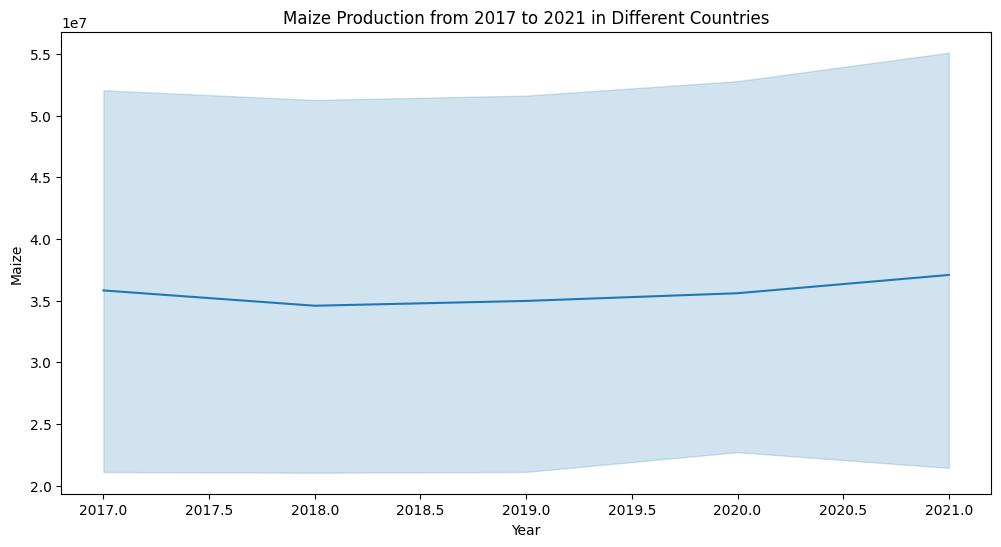

In [160]:
plt.figure(figsize=(12,6))
sns.lineplot(data=Last_5_years_data, x='Year', y='Maize')
plt.title('Maize Production from 2017 to 2021 in Different Countries')
plt.show()

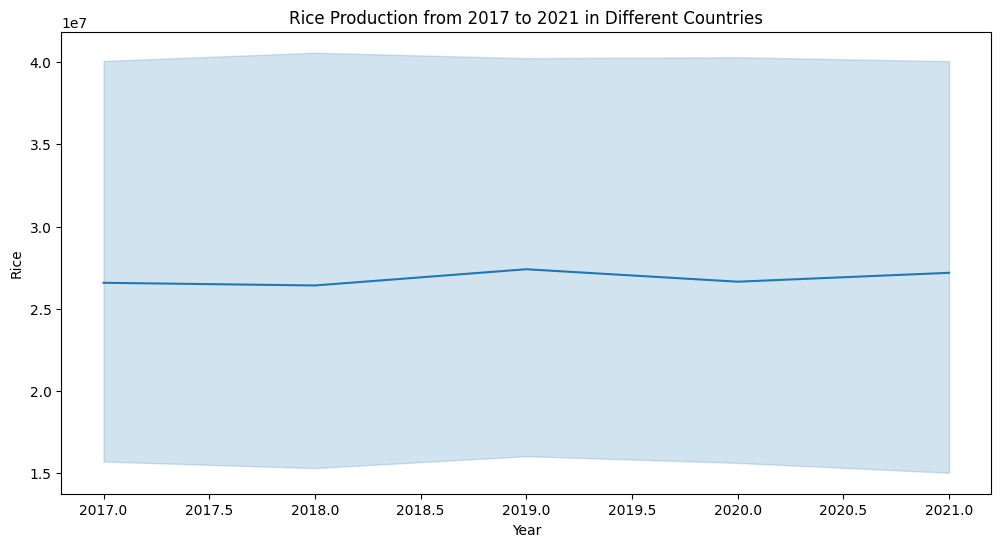

In [161]:
plt.figure(figsize=(12,6))
sns.lineplot(data=Last_5_years_data, x='Year', y='Rice')
plt.title('Rice Production from 2017 to 2021 in Different Countries')
plt.show()

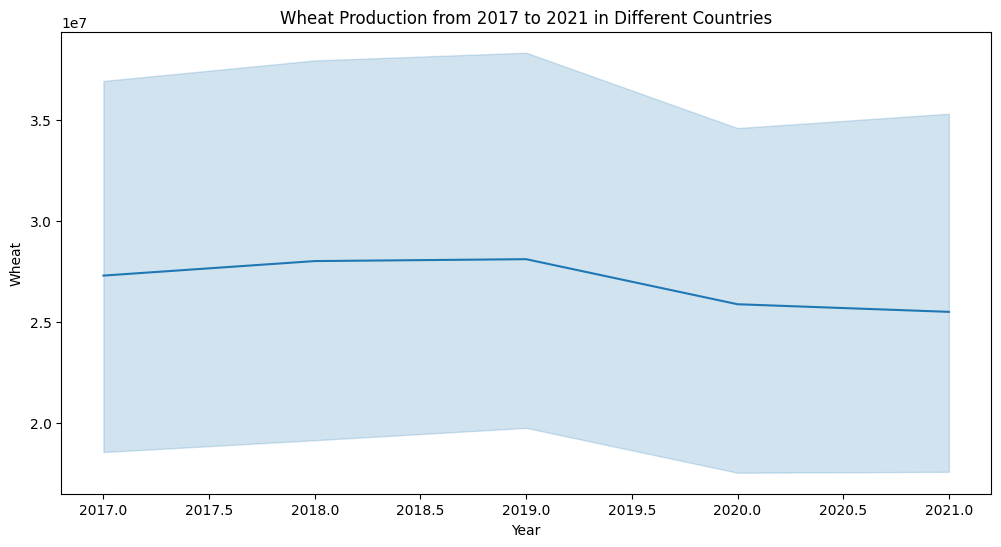

In [162]:
plt.figure(figsize=(12,6))
sns.lineplot(data=Last_5_years_data, x='Year', y='Wheat')
plt.title('Wheat Production from 2017 to 2021 in Different Countries')
plt.show()

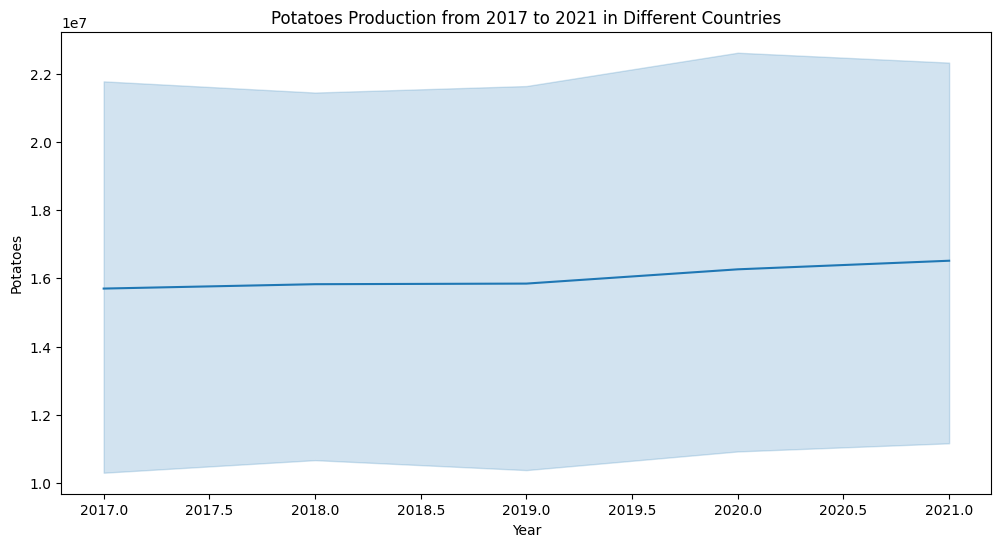

In [163]:
plt.figure(figsize=(12,6))
sns.lineplot(data=Last_5_years_data, x='Year', y='Potatoes')
plt.title('Potatoes Production from 2017 to 2021 in Different Countries')
plt.show()

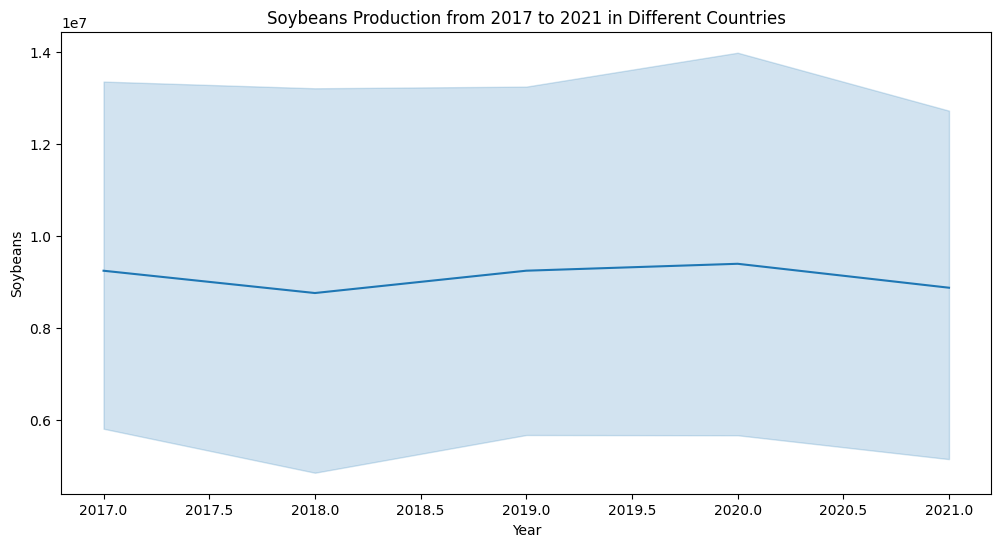

In [164]:
plt.figure(figsize=(12,6))
sns.lineplot(data=Last_5_years_data, x='Year', y='Soybeans')
plt.title('Soybeans Production from 2017 to 2021 in Different Countries')
plt.show()

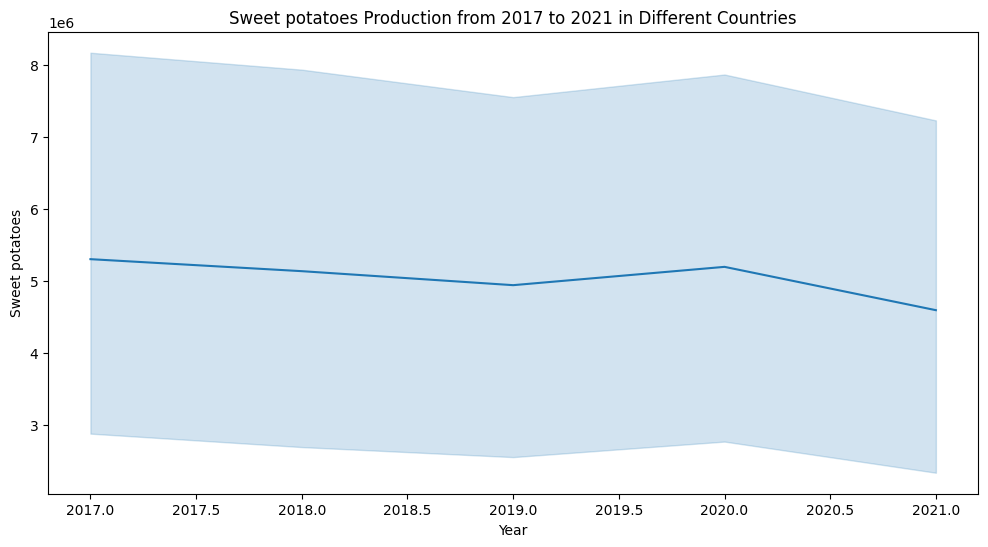

In [165]:
plt.figure(figsize=(12,6))
sns.lineplot(data=Last_5_years_data, x='Year', y='Sweet potatoes')
plt.title('Sweet potatoes Production from 2017 to 2021 in Different Countries')
plt.show()

#                                                            EGYPT MOTHER LAND

In [166]:
filter_egypt = food_prod['Entity'] == 'Egypt'
egypt_prod = food_prod[filter_egypt]
egypt_prod=egypt_prod.reset_index()
egypt_prod=egypt_prod.drop(columns='index')
egypt_prod

,Entity,Year,Maize,Rice,Yams,Wheat,Tomatoes,Tea,Sweet potatoes,Sunflower seed,...,Oranges,"Peas, dry",Palm oil,Grapes,"Coffee, green",Cocoa beans,"Meat, chicken",Bananas,Avocados,Apples
0,Egypt,1961,1617130.0,1706.95,35017000.00,2468140.0,3959.0,70881.8,90.0,2500.0,...,11000.0,0.0,37000.00,1077266.90,3000.00,306000.00,124132.0,0.00,166660.0,467.0
1,Egypt,1962,2003690.0,1700.06,29091980.00,2622578.0,4350.0,64090.4,130.0,1350.0,...,154200.0,0.0,39000.00,1130326.90,3000.00,323000.00,129089.0,20000.00,186294.0,388.0
2,Egypt,1963,1867000.0,1702.77,37328180.00,3647713.0,4750.0,75800.2,140.0,3716.0,...,133700.0,0.0,39000.00,1270884.50,3000.00,203000.00,143419.0,20000.00,189922.0,1536.0
3,Egypt,1964,1934212.0,29465.00,33134172.00,4380982.0,4800.0,435585.0,190.0,2850.0,...,107900.0,0.0,40000.00,1153797.50,2996.67,323000.00,151988.0,20000.00,191528.0,632.0
4,Egypt,1965,2141000.0,30481.00,32318900.00,3800000.0,5000.0,435585.0,260.0,21400.0,...,129300.0,0.0,41000.00,1197506.20,3016.96,318000.00,159909.0,17000.00,183952.0,1035.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,Egypt,2017,8542635.0,46674.00,122.29,14500000.0,43000.0,434255.0,194930.0,1400.0,...,582963.0,72824.0,88579.44,79699.18,1509834.00,119594.00,690300.0,87505.00,1842283.5,35300.0
57,Egypt,2018,5111236.0,70000.00,124.76,10416185.0,44000.0,419956.8,199705.0,1023.0,...,556932.0,68592.0,75000.00,77358.39,1449133.00,122771.00,726312.0,93181.83,0.0,35500.0
58,Egypt,2019,7593140.0,49000.00,127.26,10093579.0,45000.0,419956.8,204598.0,1108.0,...,579045.0,71486.0,8700.00,91931.97,1579392.00,112129.00,739350.0,98444.06,0.0,35451.0
59,Egypt,2020,7593175.0,30000.00,129.80,857350.0,46000.0,419956.8,82194.0,1542.0,...,581308.0,67169.0,8556.00,105751.98,1520687.00,114453.85,793718.0,106000.00,0.0,38907.0


In [167]:
egypt_prod.describe().iloc[1:,1:].astype(np.int64)

,Maize,Rice,Yams,Wheat,Tomatoes,Tea,Sweet potatoes,Sunflower seed,Sugar cane,Soybeans,...,Oranges,"Peas, dry",Palm oil,Grapes,"Coffee, green",Cocoa beans,"Meat, chicken",Bananas,Avocados,Apples
mean,4786690,30853,9795733,8231563,32601,414451,92908,35640,2827270,1416216,...,375381,46891,46175,226564,641918,209691,405890,27500,448669,55740
std,2101321,17360,18546841,3760076,18132,79159,60118,36278,541310,4317810,...,218088,47664,13306,292963,651243,128884,230105,32467,375912,56504
min,1617130,1700,90,857350,3959,64090,90,1023,1119149,1718,...,11000,0,8341,75988,600,71619,124132,0,0,105
25%,2780519,20430,103,5517200,23583,434255,68550,15540,2710243,3330,...,154200,324,40000,92494,3000,95032,234531,4700,222950,1128
50%,4798635,29400,130,8011675,35000,434255,82194,24601,2850000,4220,...,379928,61139,46400,118900,803870,119594,297815,13900,326816,38907
75%,6474450,36883,200,10869560,45000,435585,136540,48000,3099200,10455,...,570821,88501,50264,180000,1285652,329870,604221,26320,537258,111000
max,8542635,99890,55364000,15886608,81738,437485,204598,160000,3906700,15281824,...,703776,122026,88579,1270884,1579392,485000,941505,108838,1842283,145000


In [171]:
sum_egypt = egypt_prod.sum()
sum_egypt = sum_egypt.drop(['Entity', 'Year'])
csv_egypt=sum_egypt.astype(np.int64).sort_values(ascending= False).to_frame('Total Food Sum')
formatted_max_value = "{:,}".format(csv.max().values[0])
print(f'The Top Food is {csv.idxmax().values[0]} which was {formatted_max_value}')
csv_egypt = csv_egypt.reset_index()
csv_egypt.index = csv_egypt.index +1
csv_egypt

The Top Food is Potatoes which was 9,670,283,314


,index,Total Food Sum
1,Potatoes,9670283314
2,Yams,597539728
3,Wheat,502125363
4,Maize,291988129
5,Sugar cane,172463509
6,Soybeans,86389224
7,"Coffee, green",39157001
8,Avocados,27368836
9,Tea,25281512
10,"Meat, chicken",24759337
